In [ ]:
import pandas as pd

hard_df = pd.read_csv("hard_reliable_subset.csv")
easy_df = pd.read_csv("easy_reliable_subset.csv")

In [ ]:
easy_df

In [ ]:
easy_df.columns

In [ ]:
easy_df["sequence_length"] = easy_df["sequence"].apply(len)
hard_df["sequence_length"] = hard_df["sequence"].apply(len)

In [10]:
def gc_content(seq):
    gc_count = seq.count("G") + seq.count("C")
    return gc_count / len(seq) if len(seq) > 0 else 0

easy_df["gc_content"] = easy_df["sequence"].apply(gc_content)
hard_df["gc_content"] = hard_df["sequence"].apply(gc_content)

import math
from collections import Counter

def calculate_entropy(seq):
    length = len(seq)
    if length == 0:
        return 0.0

    freqs = Counter(seq)
    probs = [count / length for count in freqs.values()]
    entropy = -sum(p * math.log(p, 4) for p in probs if p > 0)

    return entropy

easy_df["sequence_entropy"] = easy_df["sequence"].apply(gc_content)
hard_df["sequence_entropy"] = hard_df["sequence"].apply(gc_content)

easy_df.columns

Index(['datapoint', 'sequence', 'ContextFold_prediction',
       'ContextFold_accuracy', 'ContraFold_prediction', 'ContraFold_accuracy',
       'EternaFold_prediction', 'EternaFold_accuracy', 'IPKnot_prediction',
       'IPKnot_accuracy', 'NeuralFold_prediction', 'NeuralFold_accuracy',
       'NUPACK_prediction', 'NUPACK_accuracy', 'RNAFold_prediction',
       'RNAFold_accuracy', 'RNAStructure_prediction', 'RNAStructure_accuracy',
       'pKnots_prediction', 'pKnots_accuracy', 'Simfold_prediction',
       'Simfold_accuracy', 'MXFold_prediction', 'MXFold_accuracy',
       'MXFold2_prediction', 'MXFold2_accuracy', 'SPOT-RNA_prediction',
       'SPOT-RNA_accuracy', 'sequence_length', 'gc_content',
       'sequence_entropy'],
      dtype='object')

In [18]:
from RNAFoldAssess.utils import SecondaryStructureTools


def find_longest_sequential_gc_pairing_average(sequence, structures):
    all_counts = []
    for structure in structures:
        pairings = SecondaryStructureTools.get_pairings(sequence, structure)
        findings = []
        chain = ""
        for p in pairings:
            if p == "GC":
                chain += p
            else:
                findings.append(chain)
                chain = ""
        if len(findings) == 0:
            longest = ""
        else:
            longest = max(findings)
        all_counts.append(len(longest))
    return sum(all_counts) / len(structures)


models = ['ContextFold',
 'ContraFold',
 'EternaFold',
 'IPKnot',
 'NeuralFold',
 'NUPACK',
 'RNAFold',
 'RNAStructure',
 'pKnots',
 'Simfold',
 'MXFold',
 'MXFold2',
 'SPOT-RNA']



In [19]:
import pandas as pd

# Collect prediction columns (ordered by your `models` list, and only those that exist)
hard_pred_cols = [f"{m}_prediction" for m in models if f"{m}_prediction" in hard_df.columns]
easy_pred_cols = [f"{m}_prediction" for m in models if f"{m}_prediction" in easy_df.columns]

def _avg_longest_gc_from_row(row, pred_cols):
    seq = row["sequence"]
    preds = [row[c] for c in pred_cols if pd.notna(row[c])]
    return find_longest_sequential_gc_pairing_average(seq, preds)

# Add the column to each dataframe
hard_df = hard_df.copy()
easy_df = easy_df.copy()

hard_df["average_longest_gc_helix"] = hard_df.apply(
    lambda r: _avg_longest_gc_from_row(r, hard_pred_cols), axis=1
)
easy_df["average_longest_gc_helix"] = easy_df.apply(
    lambda r: _avg_longest_gc_from_row(r, easy_pred_cols), axis=1
)

easy_df.columns

Index(['datapoint', 'sequence', 'ContextFold_prediction',
       'ContextFold_accuracy', 'ContraFold_prediction', 'ContraFold_accuracy',
       'EternaFold_prediction', 'EternaFold_accuracy', 'IPKnot_prediction',
       'IPKnot_accuracy', 'NeuralFold_prediction', 'NeuralFold_accuracy',
       'NUPACK_prediction', 'NUPACK_accuracy', 'RNAFold_prediction',
       'RNAFold_accuracy', 'RNAStructure_prediction', 'RNAStructure_accuracy',
       'pKnots_prediction', 'pKnots_accuracy', 'Simfold_prediction',
       'Simfold_accuracy', 'MXFold_prediction', 'MXFold_accuracy',
       'MXFold2_prediction', 'MXFold2_accuracy', 'SPOT-RNA_prediction',
       'SPOT-RNA_accuracy', 'sequence_length', 'gc_content',
       'sequence_entropy', 'average_longest_gc_helix'],
      dtype='object')

In [20]:
easy_df.head()

,datapoint,sequence,ContextFold_prediction,ContextFold_accuracy,ContraFold_prediction,ContraFold_accuracy,EternaFold_prediction,EternaFold_accuracy,IPKnot_prediction,IPKnot_accuracy,...,MXFold_prediction,MXFold_accuracy,MXFold2_prediction,MXFold2_accuracy,SPOT-RNA_prediction,SPOT-RNA_accuracy,sequence_length,gc_content,sequence_entropy,average_longest_gc_helix
0,00169c4c3537,GGAAAGCGUACAGCAACGGACAACGUUGCAGGUAUCGAAUAGAUAC...,.....((((((.((((((.....)))))).((((((.....)))))...,0.984762,.....((((((.((((((.....)))))).((((((.....)))))...,0.984496,.....((((((.((((((.....)))))).((((((.....)))))...,0.984496,.....((((((.((((((.....)))))).((((((.....)))))...,0.984496,...,(....((((((.((((((.....)))))).((((((.....)))))...,0.982213,.....((((((.((((((.....)))))).((((((.....)))))...,0.984496,.....((((((.((((((.....)))))).((((((.....)))))...,0.964427,96,0.427083,0.427083,6.000000
1,0022699ffb5d,GGAAAAUAAGCGCGCAAAAUGCGUAGAAAUACGCAAAACCGCAUGA...,.........(((((((...((((((....))))))...((((((.....,0.975207,........((((((((...((((((....))))))...((((((.....,0.977305,........((((((((...((((((....))))))...((((((.....,0.951613,........((((((((...((((((....))))))...((((((.....,0.937838,...,(.......((((((((...((((((....))))))...((((((.....,0.969109,........((((((((...((((((....))))))...((((((.....,0.977305,........((((((((...((((((....))))))...((((((.....,0.977305,106,0.367925,0.367925,2.000000
2,0026a473e90c,GGAAAGCGAUAGCAAAACAGCGAAAGCUGAGGAUAUCGAUGGUAAC...,.....((((((((....((((....))))......((((((....)...,0.918375,.....((((((((....((((....)))).(....((((((....)...,0.923392,.....((((((((....((((....)))).(....((((((....)...,0.923392,.....((((((((....((........))......((((((....)...,0.881200,...,(....((((((((....((((....))))......((((((....)...,0.915761,.....((((((((....((((....))))......((((((....)...,0.918375,.....((((((((....((((....))))......((((((....)...,0.902950,131,0.450382,0.450382,4.153846
3,0028a6f1683d,GGAACUAGGACAAAACGCCGCAAAACGCCGCAAAACAUCAGUAGGA...,...((((((((.....(........)(((((.....((((((((.....,0.912702,..(((((((((....((((((.....)).((....(((((((((.....,0.896391,..(((((((((....(((((.......).((....(((((((((.....,0.907230,..(((((((((......((..........((....(((((((((.....,0.932378,...,(..((((((((...............(((((....(((((((((.....,0.935492,.((((((((((....((((((..............(((((((((.....,0.880515,...((((((((..............((((((....(((((((((.....,0.929091,119,0.403361,0.403361,4.000000
4,002ece95497c,GGAAAAGGACCAAAAGGAUCCAAUCGAAGAAGAUUGGAUCCAGGAU...,......(((((....((((((((((......)))))))))).((((...,0.970443,......(((((....((((((((((......)))))))))).((((...,0.970443,......(((((....((((((((((......)))))))))).((((...,0.970443,......(((((....((((((((((......)))))))))).((((...,0.970139,...,(.....(((((....((((((((((......)))))))))).((((...,0.957857,......(((((....((((((((((......)))))))))).((((...,0.970443,...............((((((((((......)))))))))).((((...,0.891776,107,0.383178,0.383178,4.153846


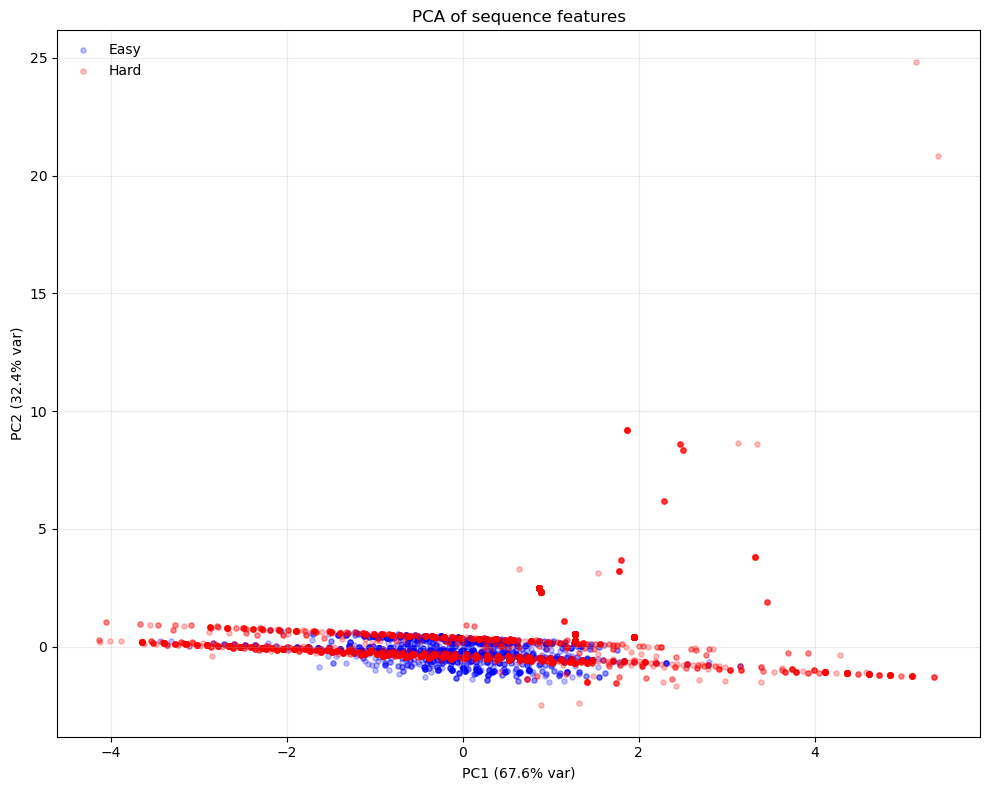

array([[ 0.16180005,  0.69778963,  0.69778963],
       [ 0.98682356, -0.11440991, -0.11440991]])

In [11]:
######
# NEED TO RECALCULATE MFE, ENS_DEF
######


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["sequence_length", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


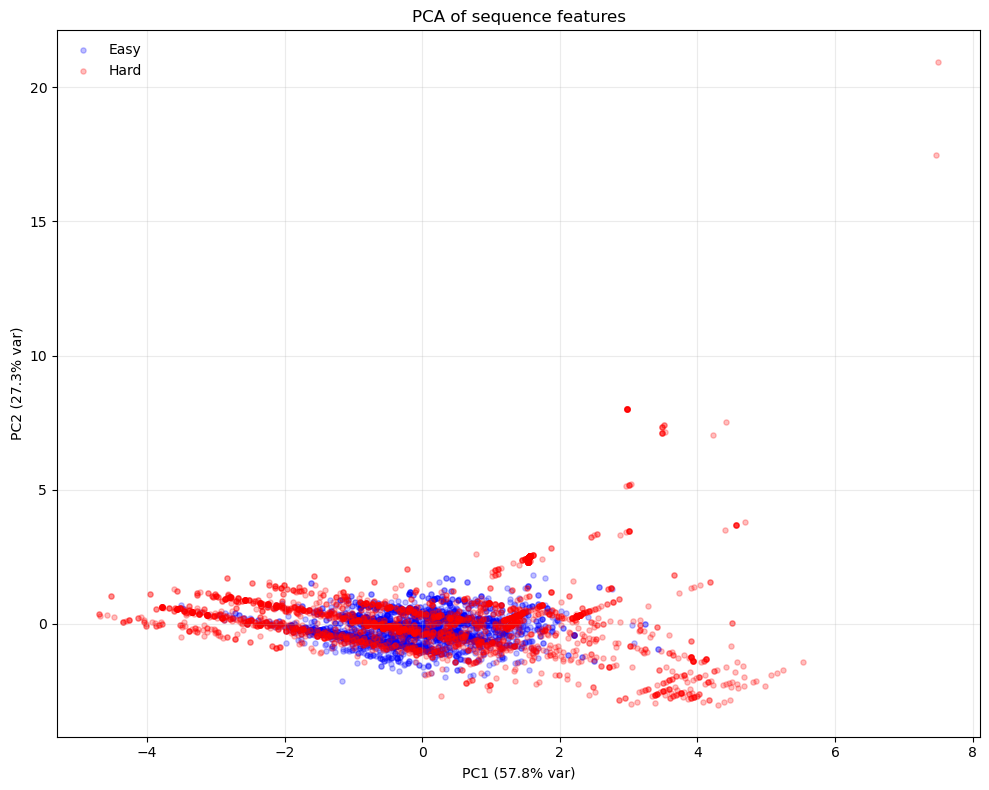

array([[ 0.2200781 ,  0.62062704,  0.62062704,  0.42568744],
       [ 0.80450013, -0.28998683, -0.28998683,  0.42964499]])

In [21]:
######
# NEED TO RECALCULATE MFE, ENS_DEF
######


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["sequence_length", "gc_content", "sequence_entropy", "average_longest_gc_helix"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_11342/571348071.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["long_gc_helix_bin", "group"]).size().unstack(fill_value=0)


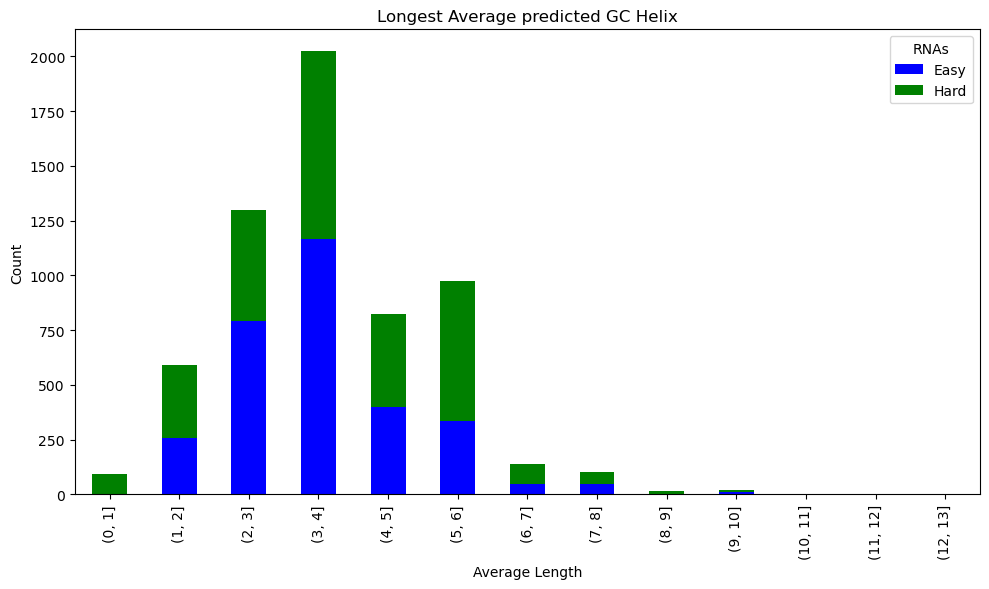

In [34]:
easy_df["group"] = "Easy"
hard_df["group"] = "Hard"

combined = pd.concat([easy_df, hard_df])

# Bin gc_content into ranges (adjust bin size as needed)
bins = range(0, 14)  # e.g., bins of width 5 if gc_content is %
combined["long_gc_helix_bin"] = pd.cut(combined["average_longest_gc_helix"], bins)

# Count occurrences per bin per group
counts = combined.groupby(["long_gc_helix_bin", "group"]).size().unstack(fill_value=0)

# Make stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["blue", "green"]
)

plt.title("Longest Average predicted GC Helix")
plt.xlabel("Average Length")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()

In [32]:
hard_df.loc[hard_df["average_longest_gc_helix"] > 150]
hard_df["average_longest_gc_helix"].max()

11.538461538461538

In [ ]:
models = ['ContextFold',
 'ContraFold',
 'EternaFold',
 'IPKnot',
 'NeuralFold',
 'NUPACK',
 'RNAFold',
 'RNAStructure',
 'pKnots',
 'Simfold',
 'MXFold',
 'MXFold2',
 'SPOT-RNA']


score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in easy_df.columns]
easy_df["avg_accuracy"] = easy_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)


In [ ]:
score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in hard_df.columns]
hard_df["avg_accuracy"] = hard_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

In [ ]:
hard_df

In [ ]:
print(hard_df["avg_accuracy"].max())
print(easy_df["avg_accuracy"].min())

In [ ]:
low_threshold = 0.65  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] > low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.9

easy_hi = easy_df[easy_df["avg_accuracy"] < hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)

In [ ]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


In [6]:
dp = "ETERNA_R76_0000_ANNOTATION_110"
seq = "GGAAAUAGUCAUCGGUGAGUACGCGCGUAGUCGAAUAAGACUACGACCGUACUCCGCGAUGACAAUAAGAGCUUCUUCGGAAGUUCAAAAGAAACAACAACAACAAC"
stc = ".......(((((((..(((((((..(((((((......)))))))..)))))))..))))))).....(((((((....)))))))....................."
rstring = "9:0.3943;10:-0.0245;11:0.3639;12:0.1509;13:0.3105;14:0.0944;15:0.2869;16:0.065;17:0.5759;18:1.6412;19:-0.0471;20:1.1983;21:-1.0015;22:5.5976;23:0.7664;24:0.7912;25:0.0944;26:0.2621;27:0.4205;28:0.648;29:0.4345;30:0.7469;31:0.3656;32:0.2554;33:0.2791;34:0.3441;35:0.1227;36:0.124;37:0.2094;38:0.1523;39:0.0359;40:0.0988;41:0.1523;42:0.2651;43:1.8448;44:0.4663;45:0.4276;46:0.1462;47:0.1183;48:0.1249;49:0.0622;50:0.6881;51:0.2202;52:0.2027;53:0.4882;54:0.2236;55:0.3105;56:0.3433;57:0.2284;58:0.1486;59:0.2966;60:0.2264;61:0.3069;62:0.3672;63:0.3339;64:3.1256;65:0.4252;66:0.1036;67:0.1508;68:0.1278;69:0.6413;70:0.4003;71:0.4809;72:0.2179;73:1.1679;74:0.4217;75:2.3709"
reactivity_map = {int(k): float(v) for k, v in (item.split(":") for item in rstring.split(";"))}
reactivity_map
affected_seq = [(seq[i], r) for i, r in reactivity_map.items()]
affected_seq
reactivities = list(reactivity_map.keys())

In [2]:
reactivities = list(reactivity_map.values())
reactivities

[0.3943,
 -0.0245,
 0.3639,
 0.1509,
 0.3105,
 0.0944,
 0.2869,
 0.065,
 0.5759,
 1.6412,
 -0.0471,
 1.1983,
 -1.0015,
 5.5976,
 0.7664,
 0.7912,
 0.0944,
 0.2621,
 0.4205,
 0.648,
 0.4345,
 0.7469,
 0.3656,
 0.2554,
 0.2791,
 0.3441,
 0.1227,
 0.124,
 0.2094,
 0.1523,
 0.0359,
 0.0988,
 0.1523,
 0.2651,
 1.8448,
 0.4663,
 0.4276,
 0.1462,
 0.1183,
 0.1249,
 0.0622,
 0.6881,
 0.2202,
 0.2027,
 0.4882,
 0.2236,
 0.3105,
 0.3433,
 0.2284,
 0.1486,
 0.2966,
 0.2264,
 0.3069,
 0.3672,
 0.3339,
 3.1256,
 0.4252,
 0.1036,
 0.1508,
 0.1278,
 0.6413,
 0.4003,
 0.4809,
 0.2179,
 1.1679,
 0.4217,
 2.3709]

In [7]:
from typing import Optional, List

import pandas as pd
import matplotlib.pyplot as plt

# import SecStruct
from rna_secstruct import *


def colors_for_sequence(seq: str):
    """
    Returns a list of colors corresponding to the input DNA/RNA sequence.
    This function maps each character in the input DNA/RNA sequence to a specific color:
    - 'A' -> 'red'
    - 'C' -> 'blue'
    - 'G' -> 'orange'
    - 'T' or 'U' -> 'green'
    - '&' -> 'gray'
    Args:
        seq (str): A string representing a RNA/DNA sequence.
    Returns:
        List[str]: A list of color strings corresponding to each character in the
        sequence.
    Raises:
        TypeError: If the input is not a string.
        ValueError: If the sequence contains invalid characters.
    """
    color_mapping = {
        "A": "red",
        "C": "blue",
        "G": "orange",
        "T": "green",
        "U": "green",
        "&": "gray",
    }
    colors = []
    for e in seq.upper():  # Convert to uppercase
        try:
            color = color_mapping[e]
            colors.append(color)
        except KeyError as exc:
            log.error(
                "Invalid character '{}' in sequence. Sequence must contain only "
                "'A', 'C', 'G', 'U', 'T', and '&'.".format(e)
            )
            raise ValueError("Invalid character '{}' in sequence.".format(e)) from exc
    return colors

def plot_pop_avg(
    seq: str,
    ss: str,
    reactivities: List[float],
    ax: Optional[plt.Axes] = None,
    axis: str = "sequence_structure",
    trim_5p: int = 0,
    trim_3p: int = 0,
    highlights: Optional[List[tuple]] = None,
) -> plt.Axes:
    """
    Plot DMS reactivity for a sequence and secondary structure.
    Args:
        seq: The sequence.
        ss: The secondary structure.
        reactivities: List of reactivities.
        ax: The matplotlib axis to plot on. If not provided,
            a new figure and axis will be created.
        axis: The axis to plot on. Possible values are
            "sequence_structure", "sequence", or "structure".
            Defaults to "sequence_structure".
        trim_5p: The number of nucleotides to trim from the 5' end.
            Defaults to 0.
        trim_3p: The number of nucleotides to trim from the 3' end.
            Defaults to 0.
        highlights: List of highlight regions. Each highlight
            region should be a tuple of start and end indices.
            Defaults to None.
    Returns:
        The plotted axis.
    """

    colors = colors_for_sequence(seq)
    x = list(range(len(seq)))
    if ax is None:
        fig, ax = plt.subplots(1, figsize=(20, 4))
    ax.bar(range(0, len(reactivities)), reactivities, color=colors)
    ax.set_xticks(x)
    if axis == "sequence_structure":
        ax.set_xticklabels([f"{s}\n{nt}" for s, nt in zip(seq, ss)])
    elif axis == "sequence":
        ax.set_xticklabels([f"{s}" for s in seq])
    elif axis == "structure":
        ax.set_xticklabels([f"{s}" for s in ss])
    else:
        pass
    return ax


def plot_pop_avg_from_row(row, data_col="data", ax=None):
    """
    Plots the population average from a given row of data.
    Args:
        row (pandas.Series): The row of data containing the sequence, structure,
            and data columns.
        data_col (str, optional): The name of the column containing the data.
            Defaults to "data".
        ax (matplotlib.axes.Axes, optional): The axes on which to plot.
            Defaults to None.
    Returns:
        matplotlib.axes.Axes: The axes object containing the plot.
    """
    return plot_pop_avg(row["sequence"], row["structure"], row[data_col], ax)




In [16]:

print(seq)
print(reactivity_map)
reactivities = []
for i, nt in enumerate(seq):
    if i in reactivity_map and reactivity_map[i] > 0:
        reactivities.append(reactivity_map[i])
    else:
        reactivities.append(0.0)


GGAAAUAGUCAUCGGUGAGUACGCGCGUAGUCGAAUAAGACUACGACCGUACUCCGCGAUGACAAUAAGAGCUUCUUCGGAAGUUCAAAAGAAACAACAACAACAAC
{9: 0.3943, 10: -0.0245, 11: 0.3639, 12: 0.1509, 13: 0.3105, 14: 0.0944, 15: 0.2869, 16: 0.065, 17: 0.5759, 18: 1.6412, 19: -0.0471, 20: 1.1983, 21: -1.0015, 22: 5.5976, 23: 0.7664, 24: 0.7912, 25: 0.0944, 26: 0.2621, 27: 0.4205, 28: 0.648, 29: 0.4345, 30: 0.7469, 31: 0.3656, 32: 0.2554, 33: 0.2791, 34: 0.3441, 35: 0.1227, 36: 0.124, 37: 0.2094, 38: 0.1523, 39: 0.0359, 40: 0.0988, 41: 0.1523, 42: 0.2651, 43: 1.8448, 44: 0.4663, 45: 0.4276, 46: 0.1462, 47: 0.1183, 48: 0.1249, 49: 0.0622, 50: 0.6881, 51: 0.2202, 52: 0.2027, 53: 0.4882, 54: 0.2236, 55: 0.3105, 56: 0.3433, 57: 0.2284, 58: 0.1486, 59: 0.2966, 60: 0.2264, 61: 0.3069, 62: 0.3672, 63: 0.3339, 64: 3.1256, 65: 0.4252, 66: 0.1036, 67: 0.1508, 68: 0.1278, 69: 0.6413, 70: 0.4003, 71: 0.4809, 72: 0.2179, 73: 1.1679, 74: 0.4217, 75: 2.3709}


<Axes: >

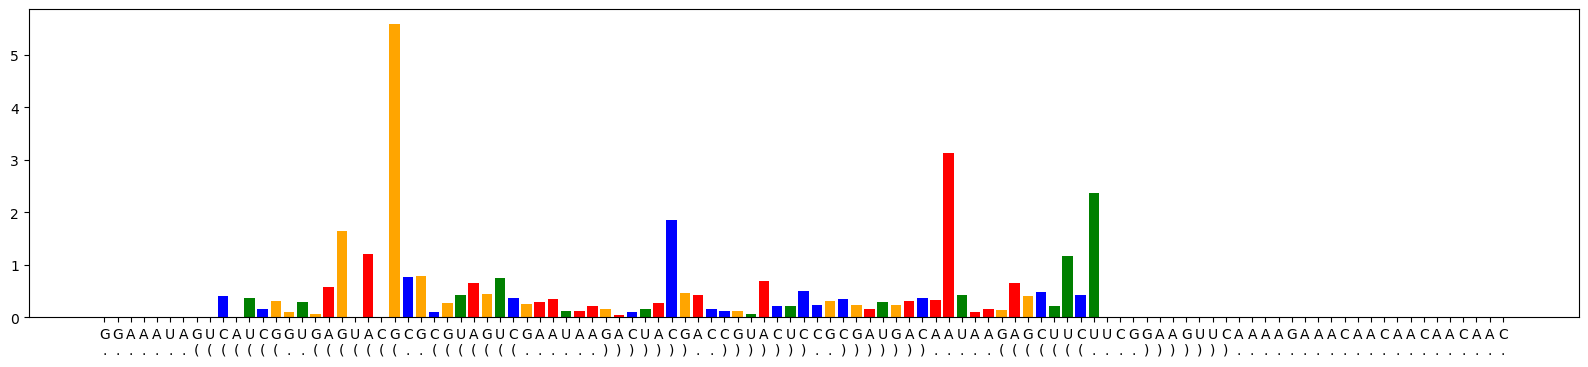

In [17]:
plot_pop_avg(seq, stc, reactivities)

In [19]:
print(dp)
print(seq)
print(stc)

ETERNA_R76_0000_ANNOTATION_110
GGAAAUAGUCAUCGGUGAGUACGCGCGUAGUCGAAUAAGACUACGACCGUACUCCGCGAUGACAAUAAGAGCUUCUUCGGAAGUUCAAAAGAAACAACAACAACAAC
.......(((((((..(((((((..(((((((......)))))))..)))))))..))))))).....(((((((....))))))).....................
